# Unit 5 - Financial Planning


In [45]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [46]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [47]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [48]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [49]:
#Execute GET request and store response
response_data_btc = requests.get(btc_url)
response_data_eth = requests.get(eth_url)

In [50]:
#Get content for 'btc' and 'eth'
response_content_btc = response_data_btc.content
response_content_eth = response_data_eth.content
print(response_content_btc)
print(response_content_eth)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18713700,\n\t\t\t"total_supply": 18713700,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 33010.0000000000000000,\n\t\t\t\t\t"volume_24h": 74365151720,\n\t\t\t\t\t"market_cap": 617732852180,\n\t\t\t\t\t"percentage_change_1h": -0.5462637877556440,\n\t\t\t\t\t"percentage_change_24h": -12.5553478662704000,\n\t\t\t\t\t"percentage_change_7d": -29.4377466241856000,\n\t\t\t\t\t"percent_change_1h": -0.5462637877556440,\n\t\t\t\t\t"percent_change_24h": -12.5553478662704000,\n\t\t\t\t\t"percent_change_7d": -29.4377466241856000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 39829.866,\n\t\t\t\t\t"volume_24h": 89728992065.352,\n\t\t\t\t\t"market_cap": 745356459440.388,\n\t\t\t\t\t"percent_change_1h": -0.5462637877556440,\n\t\t\t\t\t"percent_change_24h": -12.5553478662704000,\n\t\t\

In [51]:
#Use json function for formatting
data_btc = response_data_btc.json()
data_eth = response_data_eth.json()

data_btc, data_eth

({'data': {'1': {'id': 1,
    'name': 'Bitcoin',
    'symbol': 'BTC',
    'website_slug': 'bitcoin',
    'rank': 1,
    'circulating_supply': 18713700,
    'total_supply': 18713700,
    'max_supply': 21000000,
    'quotes': {'USD': {'price': 33010.0,
      'volume_24h': 74365151720,
      'market_cap': 617732852180,
      'percentage_change_1h': -0.546263787755644,
      'percentage_change_24h': -12.5553478662704,
      'percentage_change_7d': -29.4377466241856,
      'percent_change_1h': -0.546263787755644,
      'percent_change_24h': -12.5553478662704,
      'percent_change_7d': -29.4377466241856},
     'CAD': {'price': 39829.866,
      'volume_24h': 89728992065.352,
      'market_cap': 745356459440.388,
      'percent_change_1h': -0.546263787755644,
      'percent_change_24h': -12.5553478662704,
      'percent_change_7d': -29.4377466241856}},
    'last_updated': 1621794448}},
  'metadata': {'timestamp': 1621794448,
   'num_cryptocurrencies': 1299,
   'error': None}},
 {'data': {'102

In [52]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
current_btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
current_eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * current_btc_price
my_eth_value = my_eth * current_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39612.00
The current value of your 5.3 ETH is $10214.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [53]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [54]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [55]:
# Format current date as ISO format
today = pd.Timestamp("2021-5-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
agg_closing_price = pd.DataFrame()
spy_closing_price = pd.DataFrame()
df_portfolio = api.get_barset(tickers, timeframe, start=today, end=today,).df

# Preview DataFrame
df_portfolio.head()

AGG                                     SPY  \
                             open   high     low   close   volume    open   
time                                                                        
2021-05-21 00:00:00-04:00  114.36  114.4  114.23  114.32  3350907  416.87   

                                                            
                            high     low   close    volume  
time                                                        
2021-05-21 00:00:00-04:00  418.2  414.45  414.95  66355670

In [56]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.32
Current SPY closing price: $414.95


In [57]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20747.50
The current value of your 200 AGG shares is $22864.00


### Savings Health Analysis

In [62]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])

# Display savings DataFrame
df_savings

,amount
crypto,49826.372
shares,43611.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

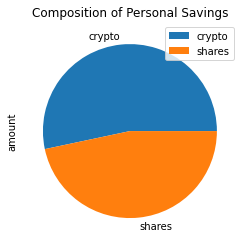

In [63]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [65]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
    print("Congratulations! You have reach this financial goal")
else:
    print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [81]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [82]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ['AGG', 'SPY']
df_ticker = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data
df_ticker.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  298252778  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.16  261233795  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  302880969  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  280560712  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  211595249

In [91]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(portfolio_data = df_ticker, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [92]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [93]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.989254e-01,1.006281e+00,1.025472e+00,9.881738e-01,9.868339e-01,1.028256e+00,1.002338e+00,9.854130e-01,9.984483e-01,1.015831e+00,...,1.002890e+00,1.007409e+00,9.848401e-01,9.741576e-01,9.977753e-01,9.900826e-01,9.936019e-01,1.014548e+00,1.003842e+00,9.961066e-01
2,1.025162e+00,1.036388e+00,1.008755e+00,9.890911e-01,1.014042e+00,1.045415e+00,9.964648e-01,9.777299e-01,9.886447e-01,1.021559e+00,...,1.013060e+00,1.020268e+00,9.866309e-01,9.772846e-01,1.000694e+00,9.921459e-01,1.004150e+00,1.002173e+00,1.013414e+00,1.012198e+00
3,1.032264e+00,1.061260e+00,1.014138e+00,9.934588e-01,9.975924e-01,1.049055e+00,1.002270e+00,9.788554e-01,9.779838e-01,1.009984e+00,...,1.006853e+00,1.030820e+00,9.670459e-01,9.808396e-01,9.982438e-01,9.991882e-01,1.016638e+00,9.858514e-01,1.024790e+00,1.008641e+00
4,1.025591e+00,1.110304e+00,1.013321e+00,1.028878e+00,9.928682e-01,1.060592e+00,9.995118e-01,9.731674e-01,9.727542e-01,1.016531e+00,...,1.004187e+00,1.046659e+00,9.537814e-01,9.847682e-01,1.017100e+00,1.004895e+00,1.017867e+00,1.001997e+00,1.019890e+00,1.003702e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.028774e+09,5.048179e+08,6.221797e+07,1.045422e+08,6.172576e+08,5.165114e+08,4.659002e+08,2.651315e+07,8.914859e+07,2.005585e+07,...,7.847054e+07,4.232318e+08,3.832588e+08,4.651008e+07,7.869741e+07,4.929573e+07,3.577773e+08,2.001696e+09,4.220949e+08,2.108582e+08
7557,1.008003e+09,5.015089e+08,6.314905e+07,1.048048e+08,6.192498e+08,5.041757e+08,4.759570e+08,2.668962e+07,8.857600e+07,2.068789e+07,...,7.903102e+07,4.316964e+08,3.798564e+08,4.664574e+07,7.963563e+07,4.917248e+07,3.623991e+08,2.026328e+09,4.150010e+08,2.123714e+08
7558,1.015033e+09,4.991027e+08,6.424597e+07,1.031436e+08,6.125135e+08,5.069605e+08,4.732189e+08,2.628917e+07,8.624190e+07,2.088403e+07,...,7.987937e+07,4.277100e+08,3.899676e+08,4.662038e+07,7.989952e+07,4.822804e+07,3.664140e+08,2.042119e+09,4.165586e+08,2.173914e+08
7559,1.010623e+09,4.957866e+08,6.334413e+07,1.031759e+08,6.174689e+08,5.059658e+08,4.738716e+08,2.676310e+07,8.670977e+07,2.082851e+07,...,8.068057e+07,4.344916e+08,3.851621e+08,4.731566e+07,8.019989e+07,4.842393e+07,3.675141e+08,2.057627e+09,4.161041e+08,2.203316e+08


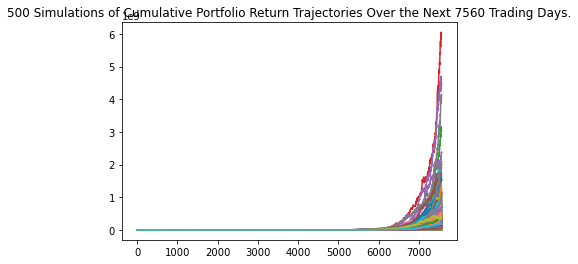

In [94]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

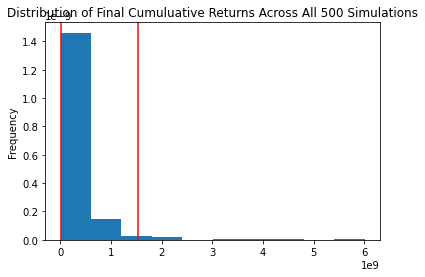

In [95]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           5.000000e+02
mean            3.275585e+08
std             5.052780e+08
min             3.154239e+06
25%             8.719007e+07
50%             1.823515e+08
75%             3.782793e+08
max             6.009229e+09
95% CI Lower    1.896365e+07
95% CI Upper    1.527347e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [97]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $379273099239.9 and $30546936226864.85


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [98]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $568909648859.85 and $45820404340297.28
